In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('credit_risk_cleaned_.csv')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32569,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32570,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32571,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32572,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

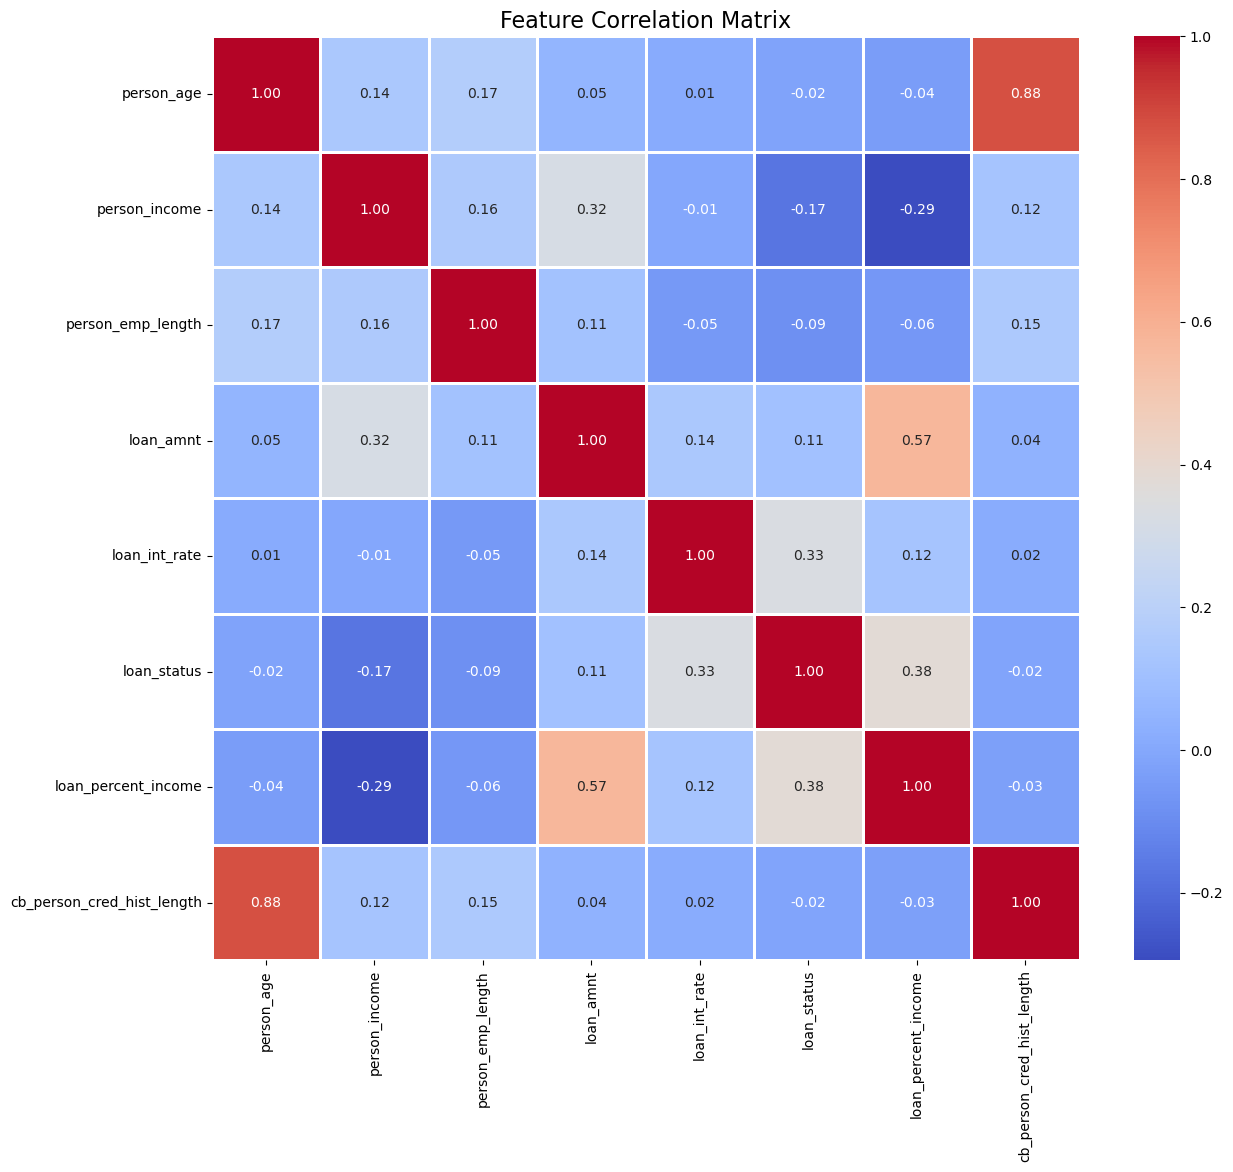

In [ ]:
#heatmap

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot  =True, fmt=".2f", cmap='coolwarm', linewidths = 1)

plt.title('Feature Correlation Matrix', fontsize = 16)
plt.show()

Key- Predictors:-- 

loan_percent_income (+0.38)

loan_int_rate (+0.33)

person_income (-0.29)

categorical_cols ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_cols []


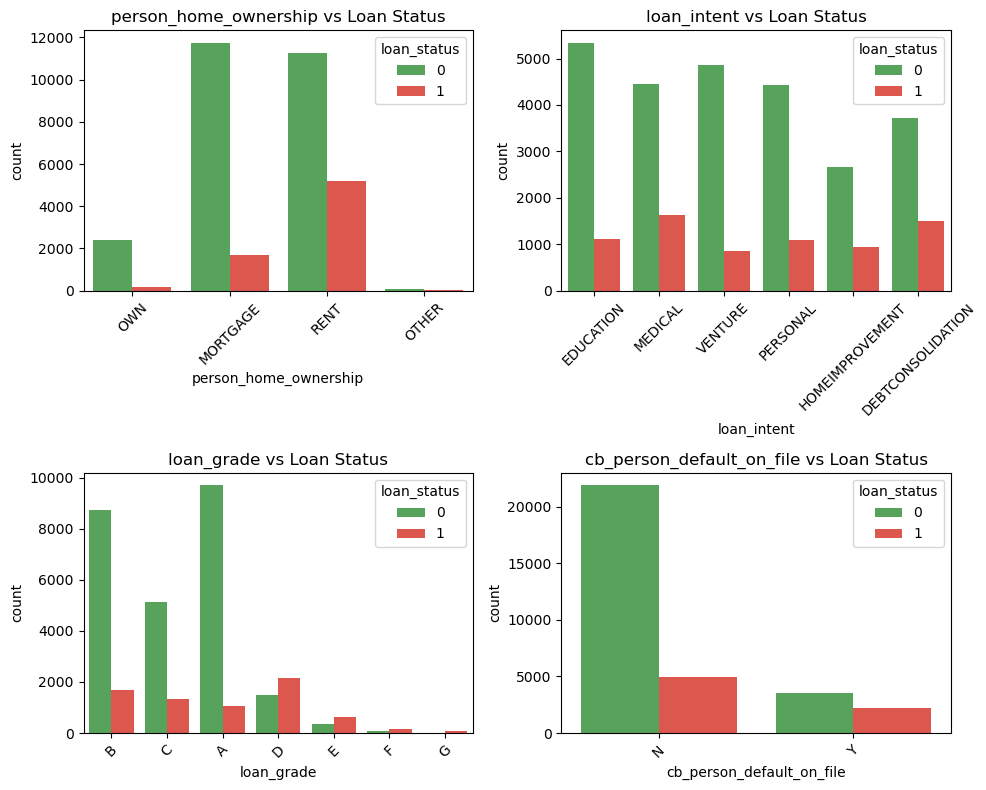

In [ ]:
categorical_cols = df.select_dtypes(include=['object','bool', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include = ['int64', 'float']).columns.tolist()

if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')
if 'loan_status' in numerical_cols:
    numerical_cols.remove('loan_status')


numerical_cols.remove('loan_amnt')
numerical_cols.remove('loan_int_rate')
numerical_cols.remove('loan_percent_income')
numerical_cols.remove('person_age')
numerical_cols.remove('person_income')
numerical_cols.remove('person_emp_length')
numerical_cols.remove('cb_person_cred_hist_length')

print("categorical_cols", categorical_cols)
print("numerical_cols", numerical_cols)

all_cols = categorical_cols + numerical_cols

n = len(all_cols)

# 4 grid 
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  

for i, col in enumerate(all_cols):
    sns.countplot(data=df, x=col, hue='loan_status', palette=['#4CAF50', '#F44336'], ax=axes[i])
    axes[i].set_title(f"{col} vs Loan Status")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

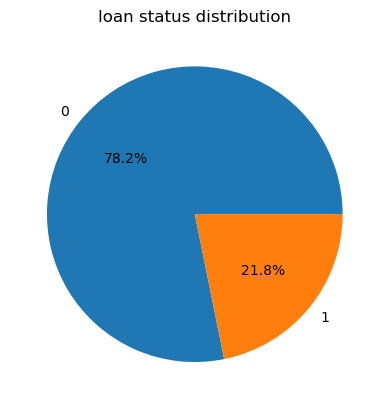

In [ ]:
values = df['loan_status'].value_counts()

plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.title('loan status distribution')
plt.show()

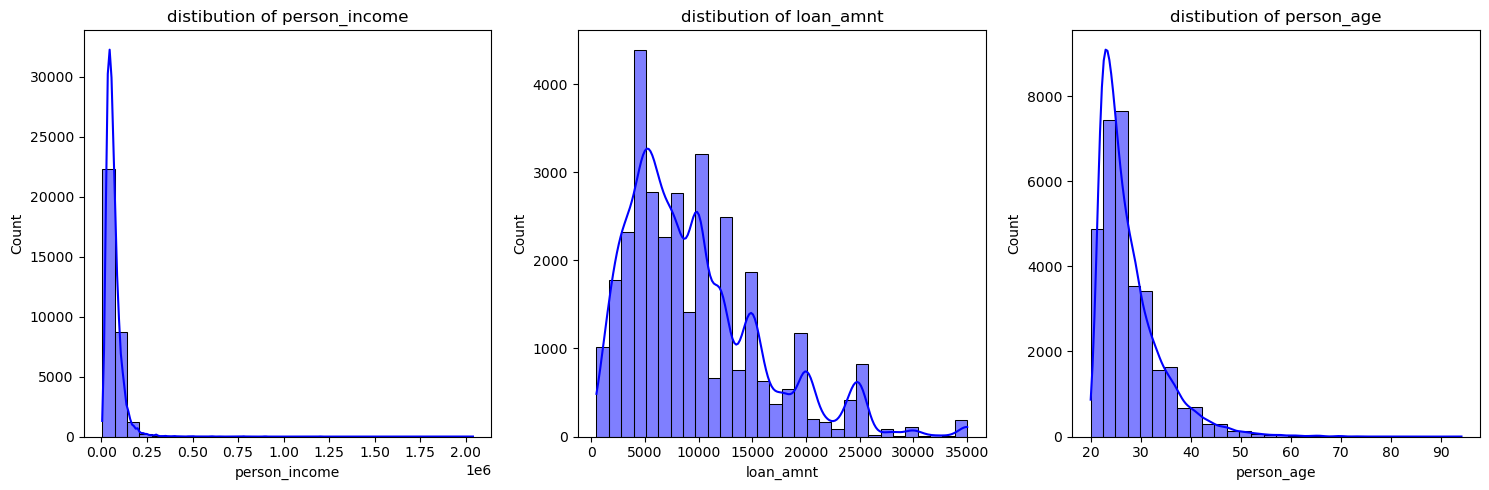

In [ ]:
cols = ['person_income', 'loan_amnt', 'person_age']

plt.figure(figsize=(15,5))

for i , col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'distibution of {col}')

plt.tight_layout()
plt.show()

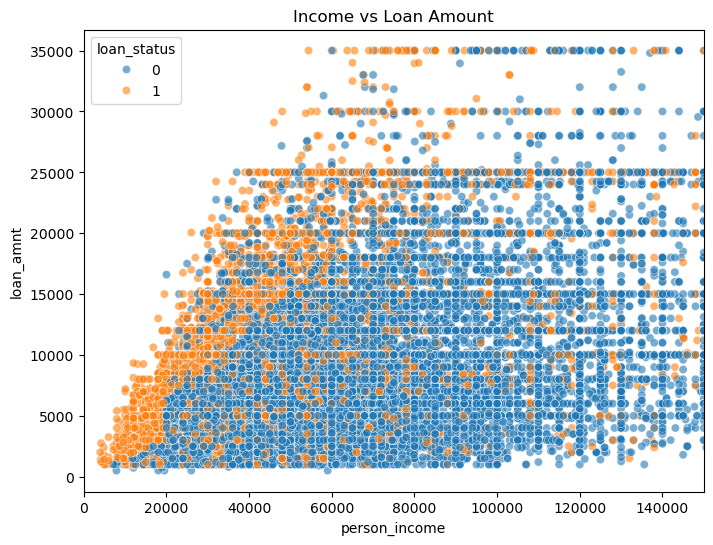

In [ ]:
plt.figure(figsize=(8, 6))

#Income vs Loan Amount
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6)

plt.title('Income vs Loan Amount')
plt.xlim(0, 150000) 
plt.show()